## Importing data and libaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Define a path for easier importing 
path = r'/Users/thomaskimber/Desktop/Task 8 Analysis folder /02 Data'

In [3]:
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
climate.shape

(22950, 170)

In [5]:
reduced =  pd.read_csv (os.path.join(path, '2010_PCA.csv'), index_col = False)
reduced

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-8.126576,-2.138915,-3.966428,0.060814,0.028138,-3.037520,1.503975,-4.177647,1.789402
1,-10.565505,0.540660,-4.616451,0.565368,-2.784018,-1.227919,3.055841,-4.542659,1.734645
2,-11.026152,4.167419,-1.905376,-0.781945,-3.886878,0.313349,0.398458,-5.369374,-0.036747
3,-10.951613,4.408962,1.281137,0.749496,-4.026034,2.153766,-0.744334,-2.707100,0.444699
4,-11.114522,2.976581,3.241646,2.059285,-3.721282,2.714744,-0.438471,-1.242425,1.488578
...,...,...,...,...,...,...,...,...,...
454,-3.679713,-2.541748,-2.433193,-0.717583,3.683469,-1.675832,0.592032,-0.456290,3.306962
455,-5.084929,1.753526,-1.367967,0.342541,1.518716,0.570555,0.243560,-1.414127,1.374045
456,-5.241732,0.142665,1.472223,-0.672213,2.697830,1.882703,-0.567826,-0.852388,2.664850
457,-5.494021,-1.987177,2.152022,-2.540548,2.862821,1.957682,-0.233974,-0.115541,0.458418


## Dendrogram code with Reduced Dataset

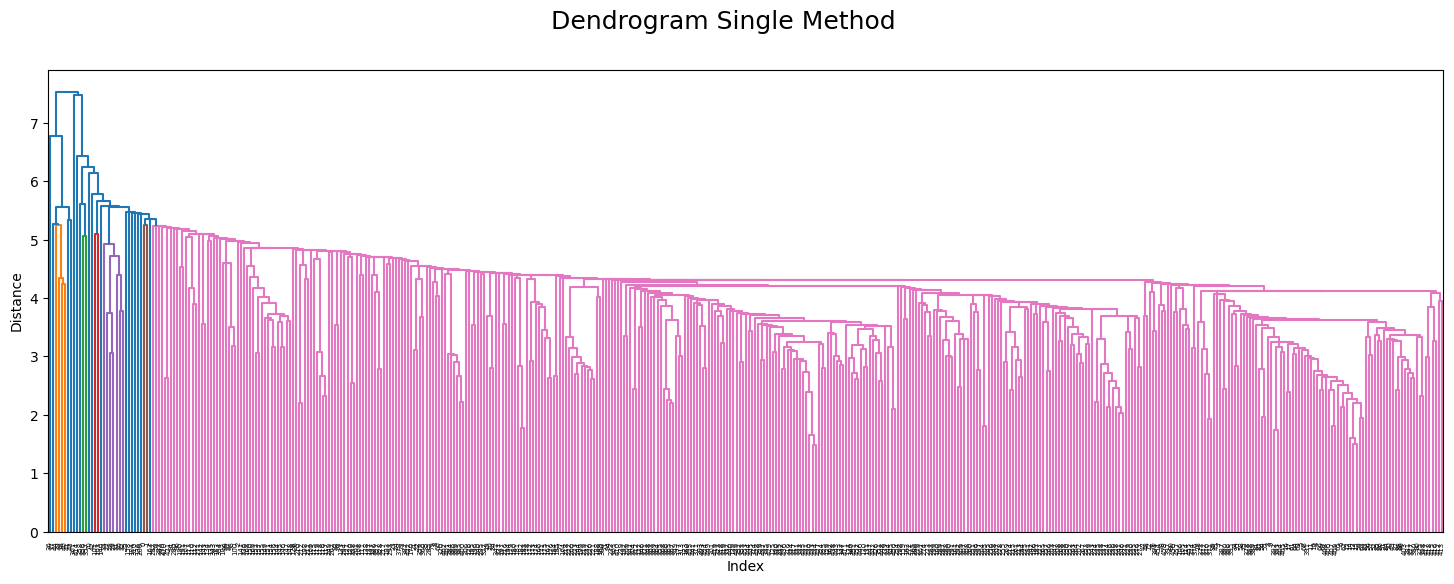

In [6]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

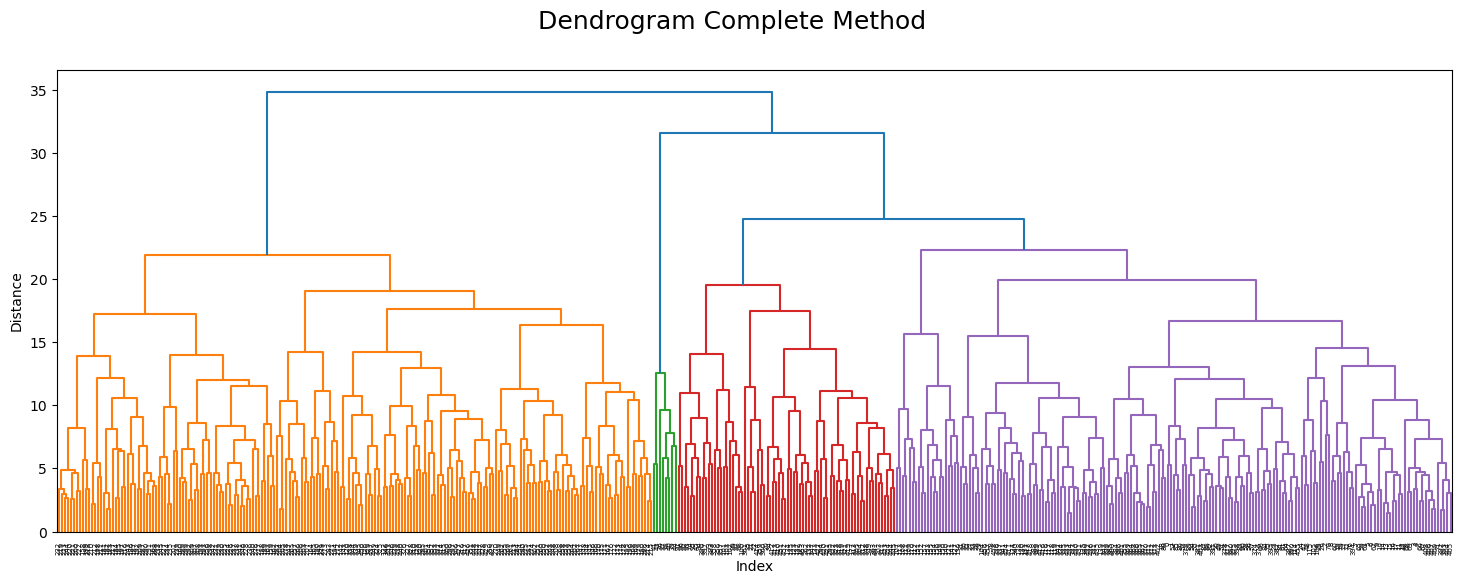

In [7]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

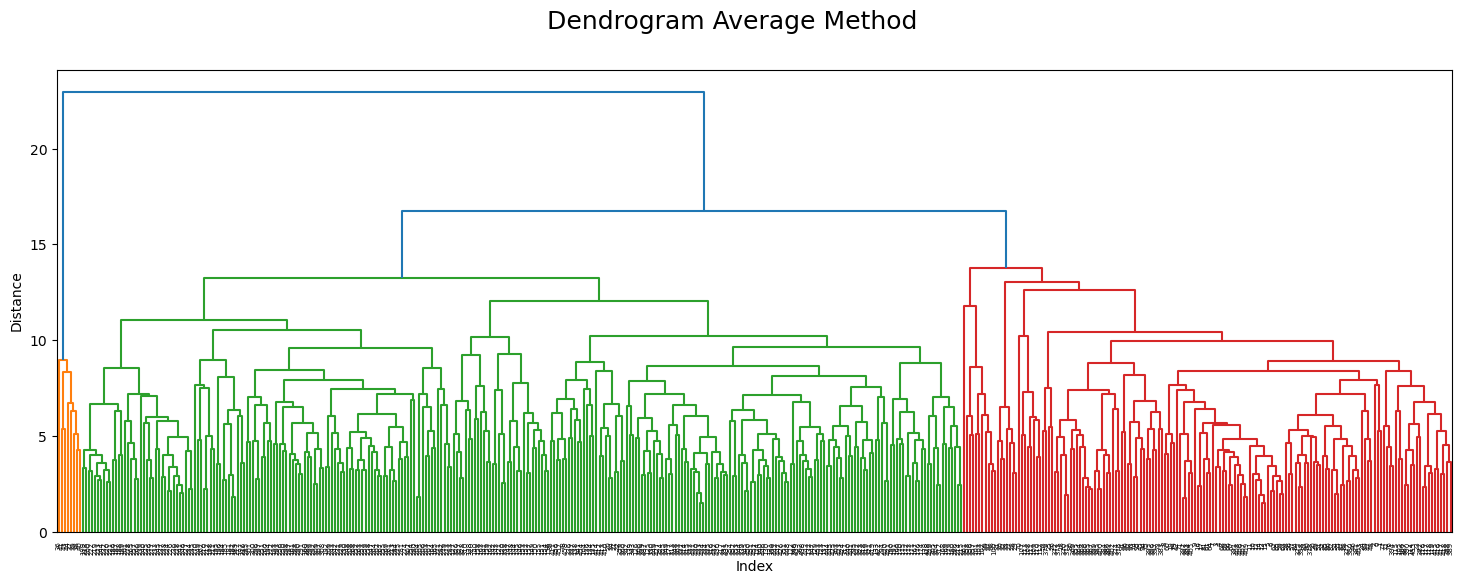

In [8]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

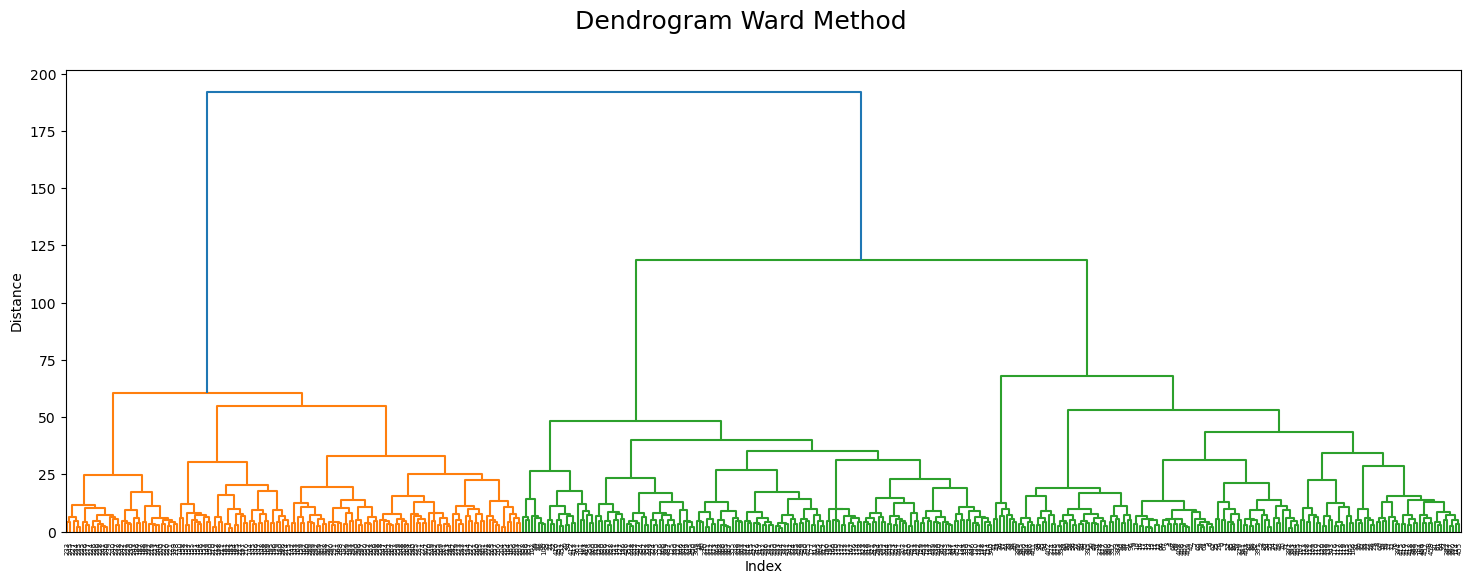

In [9]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()